In [1]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import multi_loc.covariance as covariance

In [3]:
%matplotlib inline

In [4]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [5]:
dimension = 20
rho0_x = 20
rho0_y = rho0_x
tol = 1e-50
rho_x = np.arange(dimension)
rho_y = rho_x.copy()
# rho_x = np.minimum(rho_x,
#                    (dimension - rho_x) % dimension)
# rho_y = np.minimum(rho_y,
#                    (dimension - rho_y) % dimension)

In [6]:
# x = np.arange(dimension)
# x, y = np.meshgrid(x, x)
# x = np.minimum(x, (dimension - x) % dimension)
# y = np.minimum(y, (dimension - y) % dimension)
# rho = np.sqrt(x**2 + y**2).ravel()

# eig_val_fft, eig_vec_fft, P_fft = covariance.generate_circulant(
#     rho, rho0_x, covariance.correlation_exp,
#     return_Corr = True)
# P_fft = P_fft.real

In [7]:
eig_val, eig_vec = covariance.eig_2d_covariance(
    rho_x, rho_y, rho0_x, rho0_y, tol,
    covariance.correlation_exp)

Text(0.5,1,'Eigenvalues (imaginary)')

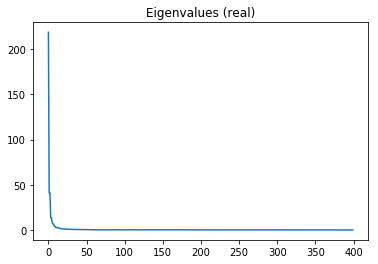

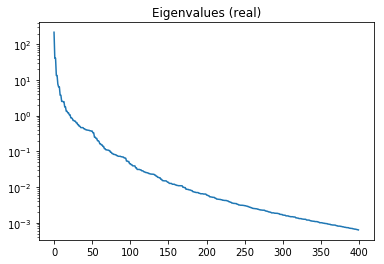

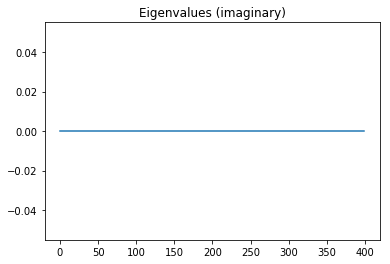

In [8]:
plt.figure()
plt.plot(eig_val.real)
plt.title('Eigenvalues (real)')

plt.figure()
plt.semilogy(eig_val.real)
# plt.ylim([0, 1])
plt.title('Eigenvalues (real)')

plt.figure()
plt.plot(eig_val.imag)
plt.title('Eigenvalues (imaginary)')

Log10(condition):  5.53883284190276


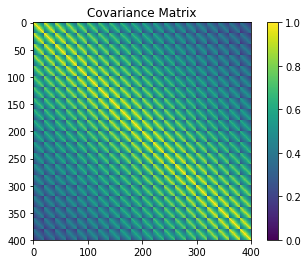

In [9]:
P = (eig_vec
     @ np.diag(eig_val)
     @ eig_vec.T)

plt.figure()
im = plt.imshow(P, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Covariance Matrix')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P.real)))

# plt.figure()
# im = plt.imshow(P_fft, vmin=0, vmax=1)
# plt.colorbar(im)
# plt.title('Covariance Matrix fft')

Text(0.5,1,'Error in Reconstructed P')

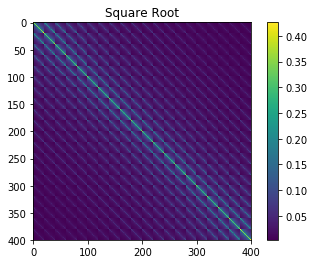

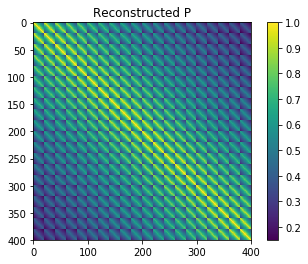

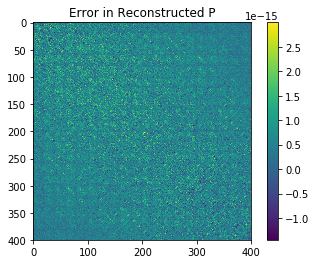

In [10]:
P_sqrt = covariance.matrix_sqrt(eig_val=eig_val,
                                eig_vec=eig_vec)
P_sqrt = P_sqrt.real

plt.figure()
im = plt.imshow(P_sqrt)
plt.colorbar(im)
plt.title('Square Root')

plt.figure()
im = plt.imshow(P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Reconstructed P')

plt.figure()
im = plt.imshow(P - P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed P')

Text(0.5,1,'Error in Reconstructed inverse')

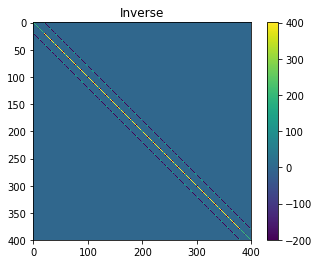

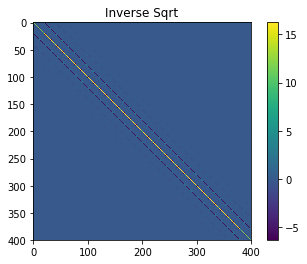

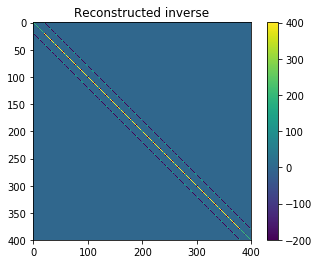

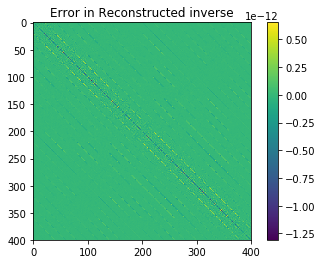

In [11]:
P_inv = covariance.matrix_inv(eig_val=eig_val,
                              eig_vec=eig_vec)
P_inv = P_inv.real

P_inv_sqrt = covariance.matrix_sqrt_inv(
    eig_val=eig_val,
    eig_vec=eig_vec)

P_inv_sqrt = P_inv_sqrt.real

plt.figure()
im = plt.imshow(P_inv)
plt.colorbar(im)
plt.title('Inverse')

plt.figure()
im = plt.imshow(P_inv_sqrt)
plt.colorbar(im)
plt.title('Inverse Sqrt')

plt.figure()
im = plt.imshow(P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Reconstructed inverse')

plt.figure()
im = plt.imshow(P_inv - P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed inverse')

In [12]:
ens_size = int(1e3)
mu = np.zeros(dimension**2)
X_ens = covariance.generate_ensemble(
    ens_size, mu, P_sqrt)

In [13]:
mu_sample = X_ens.mean(axis=1)
P_sample = np.cov(X_ens)

Text(0.5,1,'Sample mean')

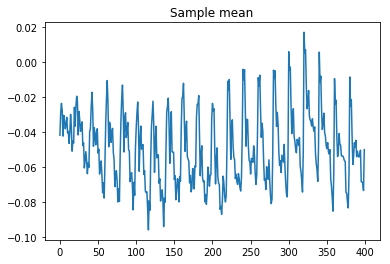

In [14]:
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

Text(0.5,1,'Error of sample')

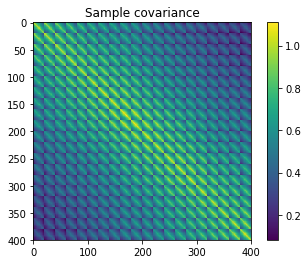

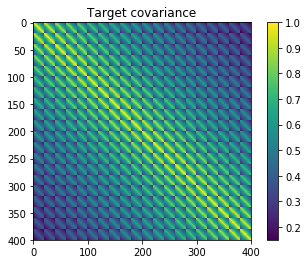

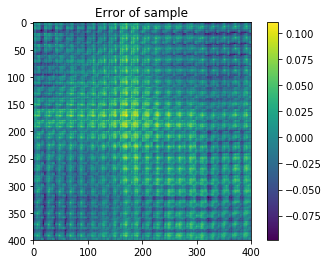

In [15]:
plt.figure()
im = plt.imshow(P_sample)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample - P)
plt.colorbar(im)
plt.title('Error of sample')

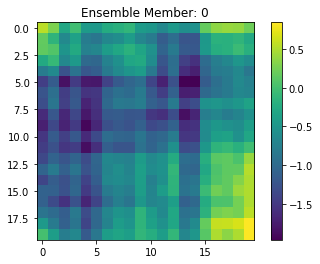

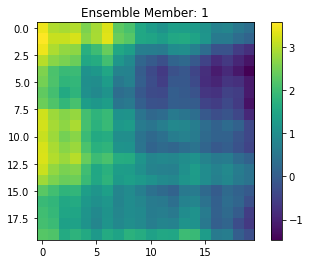

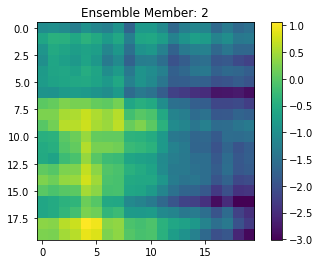

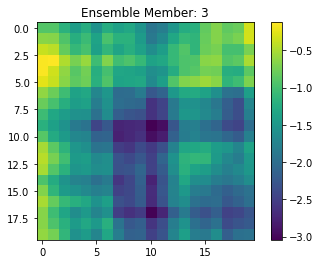

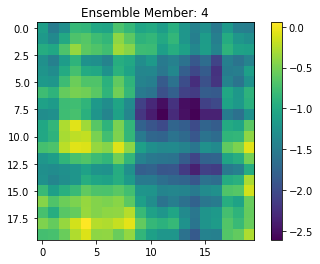

In [16]:
for ii in range(5):
    plt.figure()
    im = plt.imshow(
        X_ens[:, ii].reshape(dimension, dimension))
    plt.colorbar(im)
    plt.title(f'Ensemble Member: {ii}')

In [19]:
ens_size = int(1e3)
num_of_eig = 50
mu = np.zeros(dimension**2)
X_ens = covariance.generate_ensemble(
    ens_size, mu,
    eig_val=eig_val[:num_of_eig],
    eig_vec=eig_vec[:, :num_of_eig])

In [20]:
mu_sample = X_ens.mean(axis=1)
P_sample = np.cov(X_ens)

Text(0.5,1,'Sample mean')

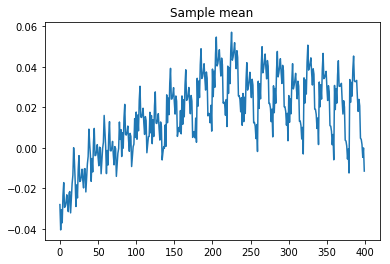

In [21]:
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

Text(0.5,1,'Error of sample')

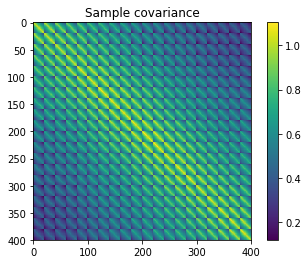

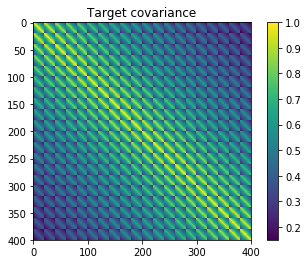

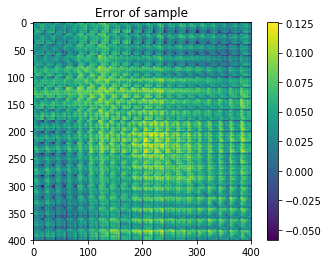

In [22]:
plt.figure()
im = plt.imshow(P_sample.real)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample.real - P)
plt.colorbar(im)
plt.title('Error of sample')

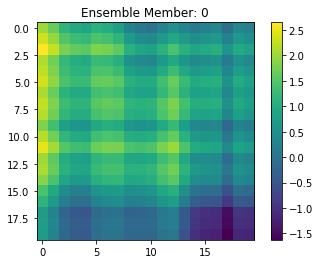

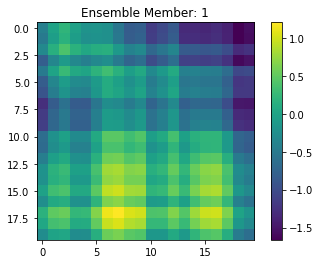

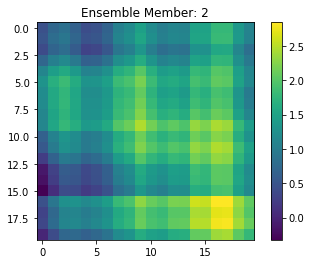

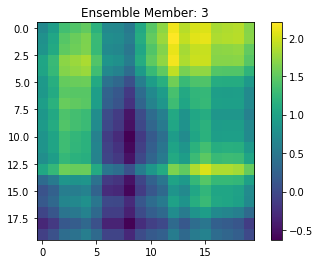

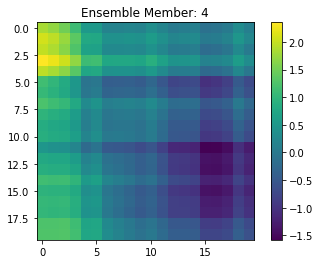

In [23]:
for ii in range(5):
    plt.figure()
    im = plt.imshow(
        X_ens[:, ii].real
        .reshape(dimension, dimension))
    plt.colorbar(im)
    plt.title(f'Ensemble Member: {ii}')

In [24]:
dimension = 100
rho0_x = 20
rho0_y = rho0_x
tol = 1e-12
rho_x = np.arange(dimension)
rho_y = rho_x.copy()
# rho_x = np.minimum(rho_x,
#                    (dimension - rho_x) % dimension)
# rho_y = np.minimum(rho_y,
#                    (dimension - rho_y) % dimension)

eig_val, eig_vec = covariance.eig_2d_covariance(
    rho_x, rho_y, rho0_x, rho0_y, tol,
    covariance.correlation_exp)

In [25]:
print('Number of Eigenvalues: ', eig_val.size)

Number of Eigenvalues:  9992


In [26]:
ens_size = int(1e3)
mu = np.zeros(dimension**2)
X_ens = covariance.generate_ensemble(
    ens_size, mu,
    eig_val=eig_val,
    eig_vec=eig_vec)

Text(0.5,1,'Sample mean')

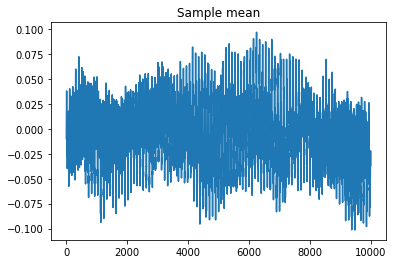

In [27]:
mu_sample = X_ens.mean(axis=1)
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

In [ ]:
P_sample = np.cov(X_ens)
P = (eig_vec 
     @ np.diag(eig_val)
     @ eig_vec.T)

In [36]:
%matplotlib notebook

<IPython.core.display.Javascript object>


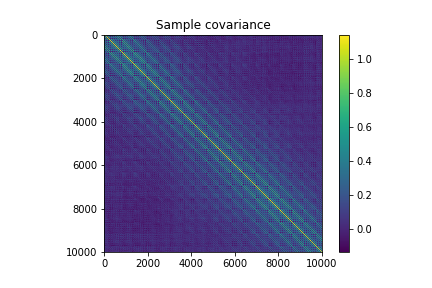

<IPython.core.display.Javascript object>


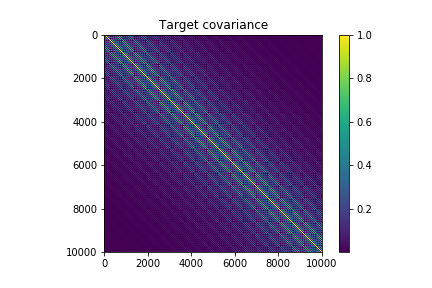

<IPython.core.display.Javascript object>


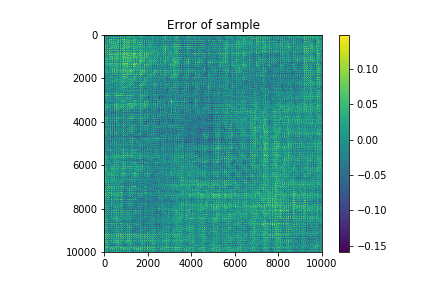

Text(0.5,1,'Error of sample')

In [37]:
plt.figure()
im = plt.imshow(P_sample)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample - P)
plt.colorbar(im)
plt.title('Error of sample')

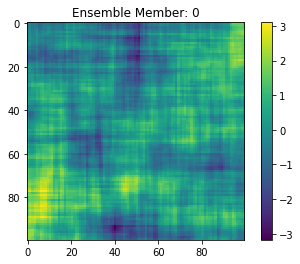

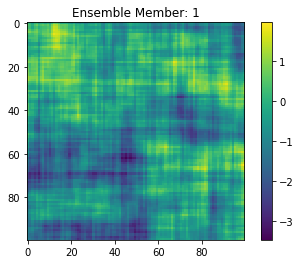

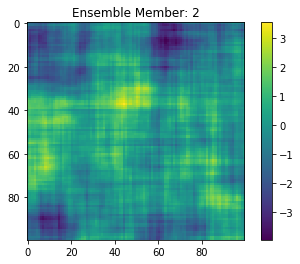

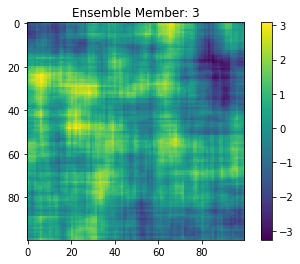

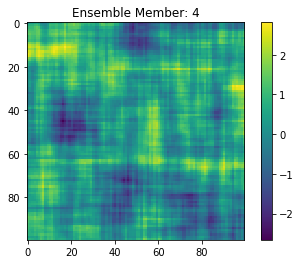

In [29]:
for ii in range(5):
    plt.figure()
    im = plt.imshow(
        X_ens[:, ii].reshape(dimension, dimension))
    plt.colorbar(im)
    plt.title(f'Ensemble Member: {ii}')